# Derivación numérica: diferencias finitas

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [19]:
using PyPlot

In [1]:
function derivada_derecha(f, x0, h = 1e-5)
    (f(x0 + h) - f(x0))/h
end

derivada_derecha (generic function with 2 methods)

In [2]:
derivada_derecha(x->3x^3-2,1)

9.000090000332861

La derivada exacta de la función $f(x) = 3x^3-2$ es $9x^2$ que al evaluarla en $x_0 = 1$ la derivada vale 9.

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [10]:
function derivada_simétrica(f,x0,h=1e-5)
    (f(x0+h)-f(x0-h))/(2*h)
end

derivada_simétrica (generic function with 2 methods)

In [11]:
derivada_simétrica(x->3x^3-2,1)

9.00000000030321

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [12]:
x = 4

4

In [98]:
function derivada_compleja(f,x0,h=1e-5)
    imag((f(x0-0+im*h))/h)
end

derivada_compleja (generic function with 2 methods)

In [99]:
derivada_compleja(x->3x^3-2,1)

8.9999999997

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

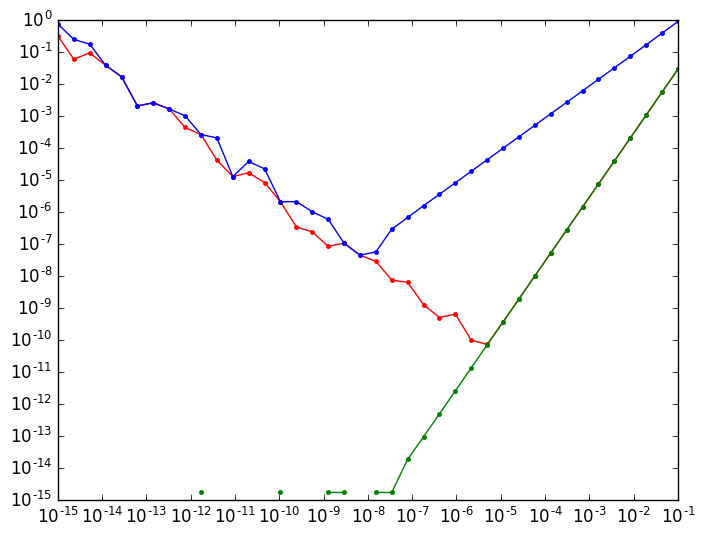

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1fedfc26a0>

In [100]:
derivada_exacta = 9
hs = linspace(-15,-1,40)
hs = 10.0.^hs
res = map(x->derivada_simétrica(y->3y^3-2,1,x), hs)
coc = abs(derivada_exacta .- res)
loglog(hs, coc, "r.-")
res = map(x->derivada_derecha(y->3y^3-2,1,x), hs)
coc = abs(derivada_exacta .- res)
loglog(hs, coc, "b.-")
res = map(x->derivada_compleja(y->3y^3-2,1,x), hs)
coc = abs(derivada_exacta .- res)
loglog(hs, coc, "g.-")

Sin duda, la ganadora es la derivada __compleja__.

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

Para valores muy pequeños de $h$, la derivada _derecha_ y _simétrica_ fallan y comienzan a dar valores distintos de la derivada.

In [101]:
f(x0) = 3*x0^3-2

f (generic function with 1 method)

In [102]:
f(1+im*hs[1])

1.0 + 9.000000000000001e-15im

Para nuestra función hacemos la evaluación en $x_0 + ih$:
$$
\begin{align*}
  &\Im 3(x_0^3 + 2ihx_0^2-h^2x_0+ihx_0^2-2h^2x_0-ih^3)-2/h\\
  &=9x_0^2-3h^2.
\end{align*}
$$

Por lo que vemos que es mucho más parecida a la derivada (cuando $h$ aumenta el error se va a cero).